#Aula00

#Analisando notas de filmes em geral

In [63]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [64]:
notas.shape

(100836, 4)

In [65]:
notas.columns = 'usuarioId', 'filmeId', 'nota', 'momento'

In [66]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [67]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [68]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [69]:
print('média', notas['nota'].mean())
print('Mediana', notas.nota.median())

média 3.501556983616962
Mediana 3.5


In [70]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

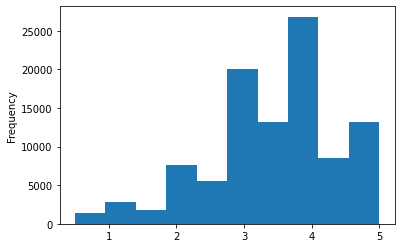

In [71]:
notas.nota.plot(kind = 'hist')

In [72]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

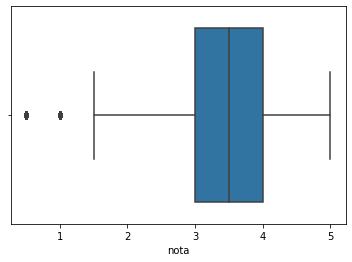

In [73]:
import seaborn as sns

sns.boxplot(notas.nota)

#Aula01

#Olhando os filmes

In [74]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Analisando as notas específicas por filme


In [75]:
notas.query('filmeId == 1').nota.mean()

3.9209302325581397

In [76]:
notas.query('filmeId == 2').nota.mean()

3.4318181818181817

In [77]:
medias_por_filme = notas.groupby('filmeId').mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

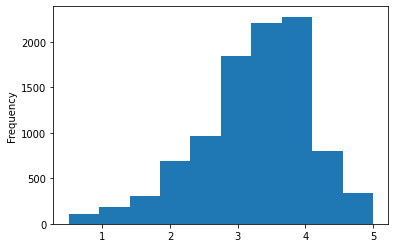

In [78]:
medias_por_filme.plot(kind = 'hist')

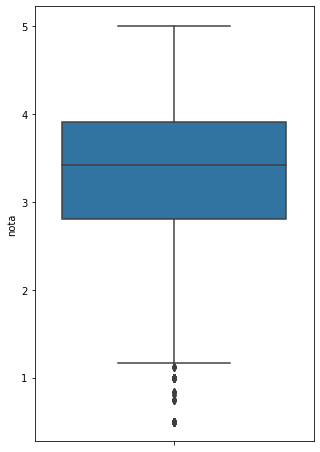

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y = medias_por_filme)

In [80]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

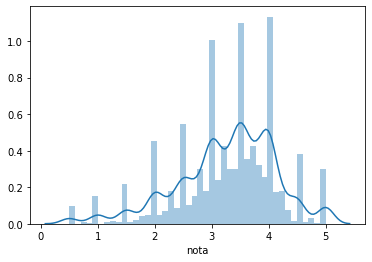

In [81]:
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias do filme')

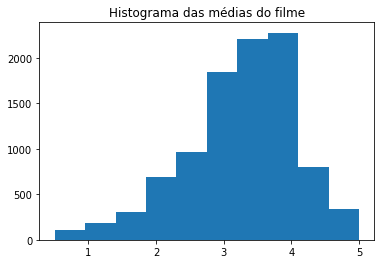

In [82]:

plt.hist(medias_por_filme)
plt.title('Histograma das médias do filme')

#Aula02


In [88]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [89]:
tmdb.original_language.unique() #categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
# primeiro grau
# segundo grau
# 1 gray < 2 grau < 3 grau categorica ordinal

In [ ]:
# budget     => orçamento         => quantitativa contínuo
# vote_count => contagem de votos => quantitativo discreto

#Aula03

In [97]:
contagem_lingua         = tmdb['original_language'].value_counts() .to_frame().reset_index() #duas colunas, index e values, por isso é série
contagem_lingua.columns = ['original_language', 'total']
contagem_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


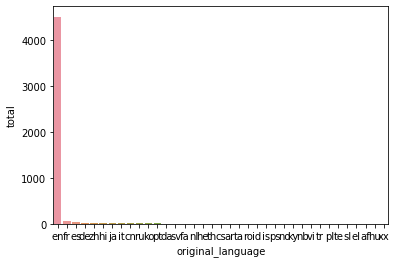

In [98]:
sns.barplot(x = 'original_language', y = 'total', data = contagem_lingua)

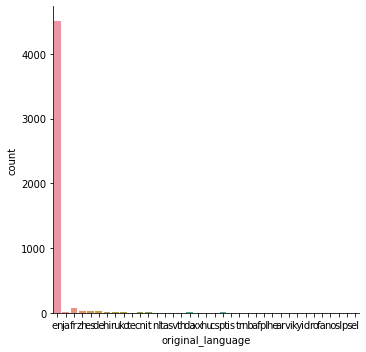

In [99]:
sns.catplot(x = 'original_language', kind = 'count', data = tmdb)

([<matplotlib.patches.Wedge at 0x7fab5a948048>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

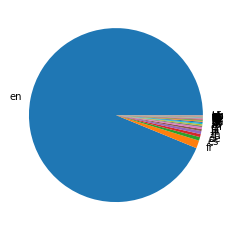

In [101]:
plt.pie(contagem_lingua['total'], labels = contagem_lingua['original_language']) #nunca usar

In [103]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral      = total_por_lingua.sum()
total_de_ingles  = total_por_lingua.loc['en']
total_do_resto   = total_geral - total_de_ingles

print(total_de_ingles, total_do_resto)

4505 298


In [104]:
dados = {
        'lingua':['ingles','outros'],
         'total':[total_de_ingles, total_do_resto]
}
sns.barplot(x = 'lingua', y = 'total', data = dados)

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [117]:
total_lingua_outros = tmdb.query('original_language != "en"').original_language.value_counts()

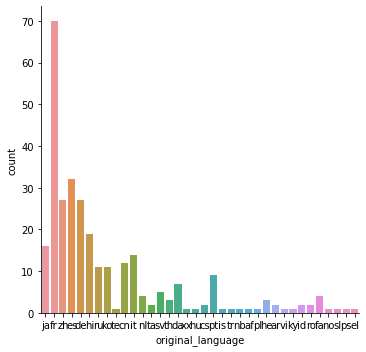

In [128]:
filmes_nao_ingles = tmdb.query('original_language != "en"')

sns.catplot(x = 'original_language', kind = 'count', data = filmes_nao_ingles)

#Aula04

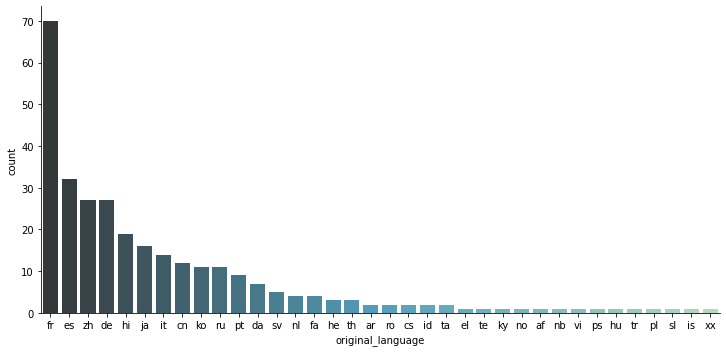

In [129]:
sns.catplot(x = 'original_language', kind = 'count', data = filmes_nao_ingles,
            aspect = 2, order = total_lingua_outros.index,
            palette = 'GnBu_d')

# Aula05

##Revisando média, mediana, medidas de tendencia central

In [131]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [134]:
notas_ts      = notas.query('filmeId == 1')
notas_jumanji = notas.query('filmeId == 2')
print(len(notas_ts), len(notas_jumanji))

215 110


In [137]:
print('Nota média do Toy Stoy %.2f' % notas_ts.nota.mean())
print('Nota média do Jumanji  %2f'   % notas_jumanji.nota.mean())

Nota média do Toy Stoy 3.92
Nota média do Jumanji  3.431818


In [138]:
print('Mediana do Toy Stoy %.2f' % notas_ts.nota.median())
print('Mediana do Jumanji  %2f'   % notas_jumanji.nota.median())

Mediana do Toy Stoy 4.00
Mediana do Jumanji  3.500000


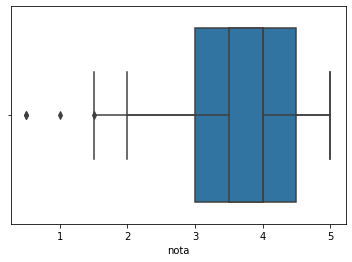

In [140]:
sns.boxplot(notas_ts.nota)
sns.boxplot(notas_jumanji.nota)

{'boxes': [<matplotlib.lines.Line2D at 0x7fab59e1f1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fab59e1fbe0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fab59e2d6a0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fab59e2d320>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fab59e1f4e0>,
  <matplotlib.lines.Line2D at 0x7fab59db6160>]}

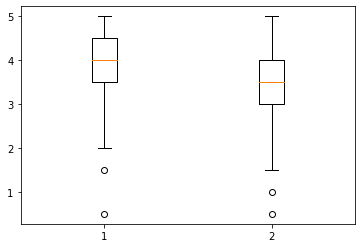

In [142]:
plt.boxplot([notas_ts.nota, notas_jumanji.nota])

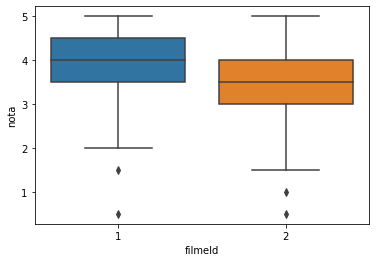

In [145]:
sns.boxplot(x = 'filmeId', y = 'nota', data = notas.query('filmeId in [1, 2]'))

In [147]:
print(notas_ts.nota.std(), 
      notas_jumanji.nota.std())


0.8348591407114045 0.8817134921476455
